<a href="https://colab.research.google.com/github/dp1706/Machine-Learning/blob/master/Dimensionality%20Reduction/Implementing_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'>PCA</h1>

## Module

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

## DataSet

In [ ]:
dataset = load_iris()
print(dataset.DESCR)

In [3]:
X = pd.DataFrame(dataset.data,columns=dataset.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
Y = pd.DataFrame(dataset.target,columns=['Class'])
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
X.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
Y.isna().sum()

Class    0
dtype: int64

In [ ]:
X.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

In [ ]:
Y.nunique()

Class    3
dtype: int64

## Data PreProcessing And Data Visualization

In [105]:
corr_table = X.corr()
corr_table

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


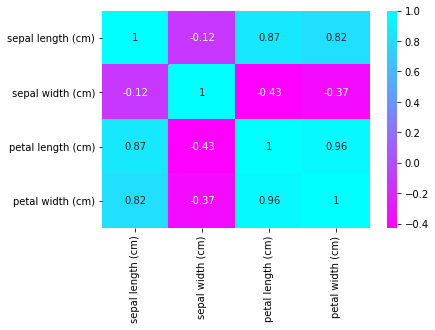

In [109]:
sns.heatmap(corr_table,annot=True,cmap='cool_r')
plt.show()

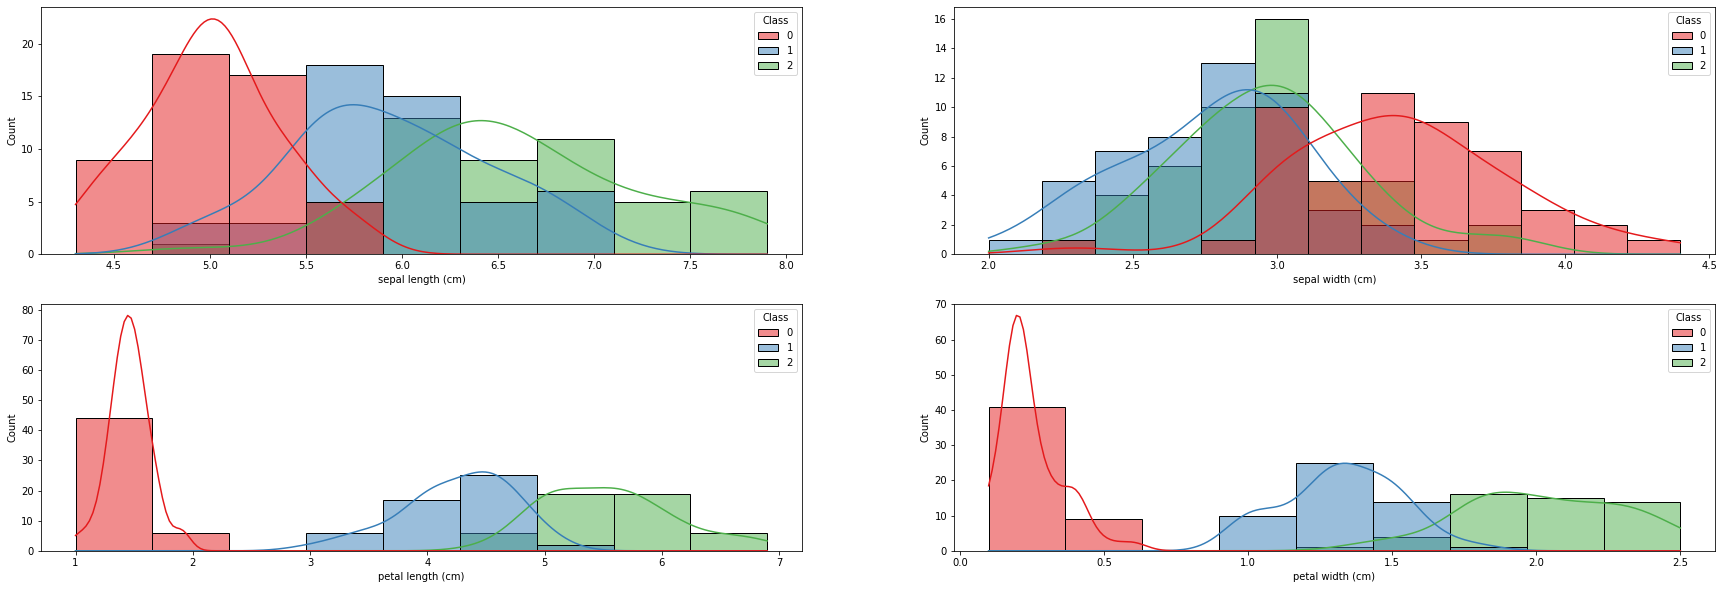

In [120]:
""" plotting features """

fig ,  axes = plt.subplots(2,2 , figsize=(30,10))
sns.histplot(data=X.join(Y),x='sepal length (cm)',legend=True,kde=True,ax=axes[0,0],hue='Class',palette='Set1')
sns.histplot(data=X.join(Y),x='sepal width (cm)',legend=True,kde=True,ax=axes[0,1],hue='Class',palette='Set1')
sns.histplot(data=X.join(Y),x='petal length (cm)',legend=True,kde=True,ax=axes[1,0],hue='Class',palette='Set1')
sns.histplot(data=X.join(Y),x='petal width (cm)',legend=True,kde=True,ax=axes[1,1],hue='Class',palette='Set1')
plt.show()


In [79]:
sc = StandardScaler()
Xs = pd.DataFrame(sc.fit_transform(X),columns=dataset.feature_names)
Xs.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## PCA From Scratch

In [80]:
feat = Xs.T
cov_mat = np.cov(feat)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [81]:
eigen_val , eigen_vect = np.linalg.eig(cov_mat)

In [82]:
print("Eigen Values : ")
for idx , val in enumerate(eigen_val):
  print("eigen value {} is : {} ".format(idx,val))

Eigen Values : 
eigen value 0 is : 2.938085050199995 
eigen value 1 is : 0.9201649041624864 
eigen value 2 is : 0.1477418210449475 
eigen value 3 is : 0.020853862176462696 


In [83]:
print("Eigen Vector : ")
for idx , val in enumerate(eigen_vect):
  print("eigen value {} is : {} ".format(idx ,val))

Eigen Vector : 
eigen value 0 is : [ 0.52106591 -0.37741762 -0.71956635  0.26128628] 
eigen value 1 is : [-0.26934744 -0.92329566  0.24438178 -0.12350962] 
eigen value 2 is : [ 0.5804131  -0.02449161  0.14212637 -0.80144925] 
eigen value 3 is : [ 0.56485654 -0.06694199  0.63427274  0.52359713] 


In [87]:
eig_pairs = [(np.abs(eigen_val[i]), eigen_vect[:,i]) for i in range(len(eigen_val))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.938085050199995
0.9201649041624864
0.1477418210449475
0.020853862176462696


In [84]:
print("Explained Variance.....")
for i in range(len(eigen_val)):
  print("variance {} is : {}".format(i,eigen_val[i]/sum(eigen_val)))

Explained Variance.....
variance 0 is : 0.7296244541329989
variance 1 is : 0.22850761786701754
variance 2 is : 0.03668921889282865
variance 3 is : 0.005178709107154905


In [91]:
W = eigen_vect[:,:2]
W

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [93]:
New_Features = pd.DataFrame(Xs.to_numpy().dot(W),columns=['pca1','pca2'])
New_Features['y'] = Y['Class'].values
New_Features.head()

,pca1,pca2,y
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0


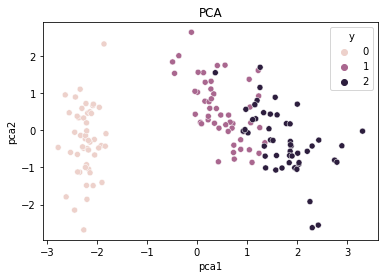

In [103]:
ax = plt.subplot(111)
sns.scatterplot(data=New_Features,x='pca1',y='pca2',hue='y') 
plt.title('PCA')
plt.show()

## PCA From Scikit-Learn

In [64]:
from sklearn.decomposition import PCA

In [65]:
model = PCA(n_components=2)

In [71]:
p_component = model.fit_transform(Xs)
p_component[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [69]:
model.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [73]:
data = pd.DataFrame(p_component,columns=['pca1','pca2'])
data.head()

,pca1,pca2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [74]:
data['y'] = Y['Class'].values

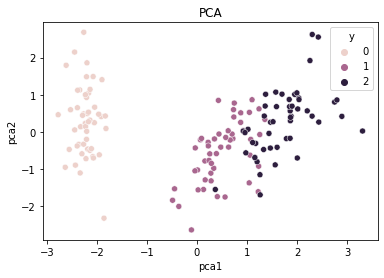

In [78]:
ax = plt.subplot(111)
sns.scatterplot(data=data,x='pca1',y='pca2',hue='y')
plt.title('PCA')
plt.show()